In [15]:
from scipy import io
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
from myPlot import  figmaster,myClrbr, dta_colr


pth='C:/Users/shjo/OneDrive/mySO/SCP_EEMD/OHC700_1993_2020_230E250E_60S50S/EEMD_results/'
wpth='C:/Users/shjo/OneDrive/mySO/SCP_EEMD/OHC700_1993_2020_230E250E_60S50S/'

eemd_lst=[i for i in os.listdir(pth) if i.endswith('.mat')]

try:
    os.listdir(wpth+'Figs/')
except:
    pass
wpth=wpth+'Figs/'


In [3]:
nm=eemd_lst[0]

In [4]:
tmp=nm.split('.')[0].replace('_',' ').split(' ')
tmp[0]+'_'+tmp[1]+'_'+tmp[2]+'_'+tmp[3]+'_'+tmp[4]+'_'+tmp[5]+'_'+tmp[6]

'EEMD_ECCO_OHC700_1993_2017_230E250E_60S50S'

In [9]:
N=4
myEEMDS=pd.DataFrame({})
for i,nm in zip(eemd_lst,eemd_lst):
    tmp=nm.split('.')[0].replace('_',' ').split(' ')
    myEEMD=io.loadmat(pth+i)['tmp'][:,N]
    myTime=pd.date_range('1993-01',periods=myEEMD.shape[0],freq='1M')
    B=pd.DataFrame({tmp[1]:myEEMD},index=myTime)
    myEEMDS=pd.concat([myEEMDS,B],axis=1)
               
                         

C:\Users\shjo\AppData\Local\Temp\ipykernel_13992\3469217439.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


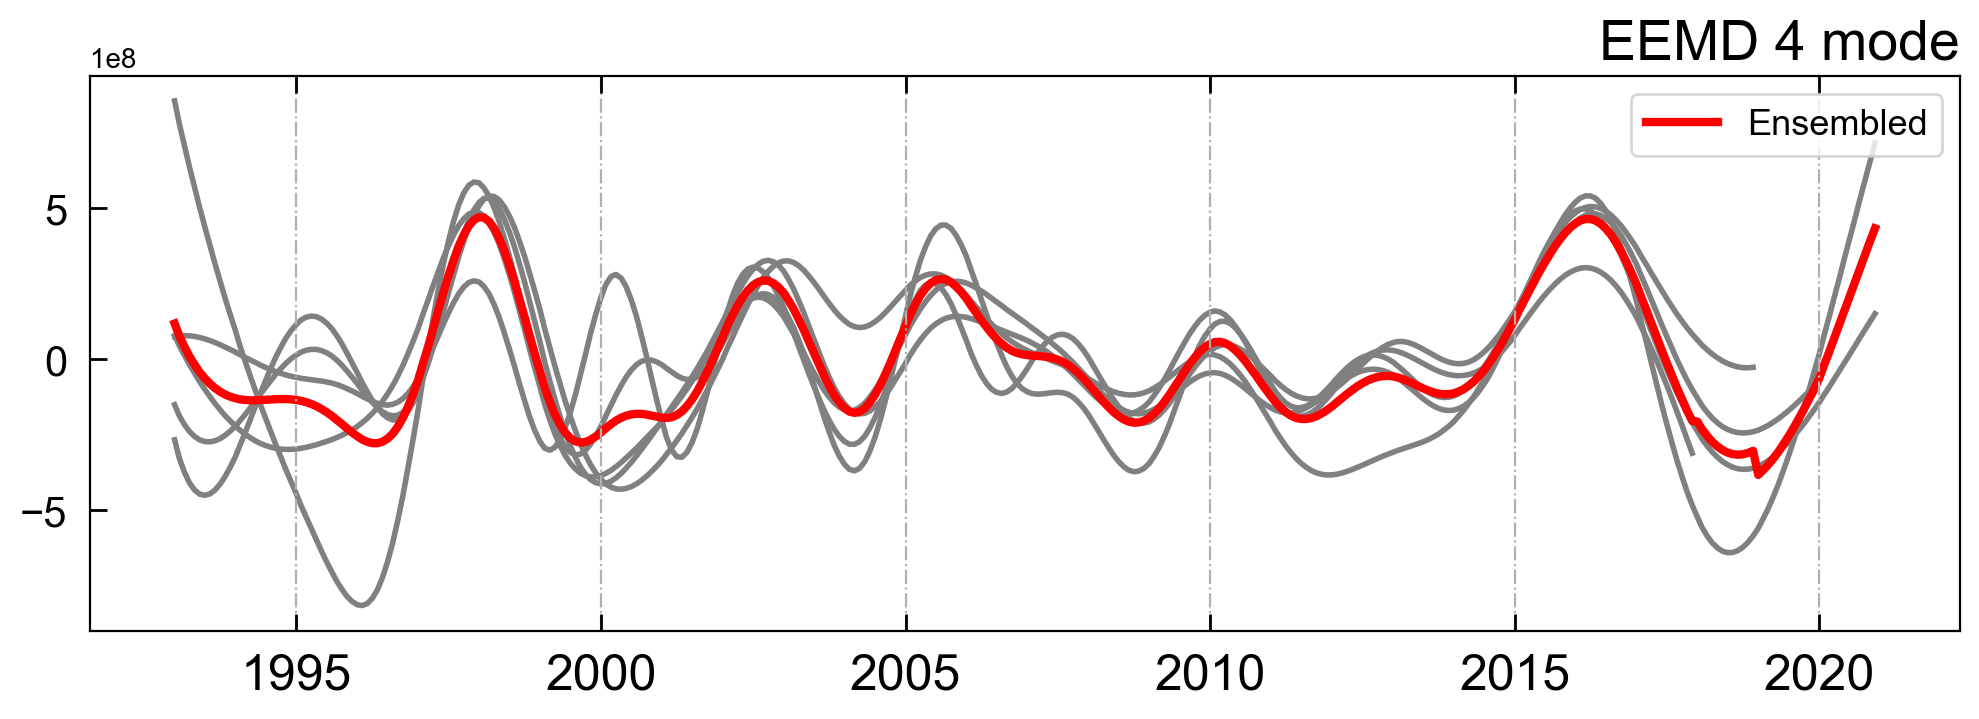

In [21]:
Label_size = 18
myNm=myEEMDS.columns
TIME=myEEMDS.index
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,dpi=200)
for i in myNm:
    f1 = axs.plot(TIME,myEEMDS[i], label='',color='grey',linewidth=2,zorder=0)
axs.plot(TIME,myEEMDS.mean(axis=1),label='Ensembled',linewidth=3,color='r',zorder=0)
axs.set_title('EEMD '+str(N)+' mode',loc='right',fontdict={'fontsize':20,'fontweight':'regular'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[24::12*5]
xtick_labels = TIME.strftime('%Y')[24::12*5]
axs.set_xticks(ticks=xtick_location)
plt.legend(fontsize='13',loc='upper right')
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
if 1:
    # plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(wpth+'EEMD_'+str(N)+'_mode_ensembled',bbox_inches='tight')
plt.show()

C:\Users\shjo\AppData\Local\Temp\ipykernel_13992\2186964384.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


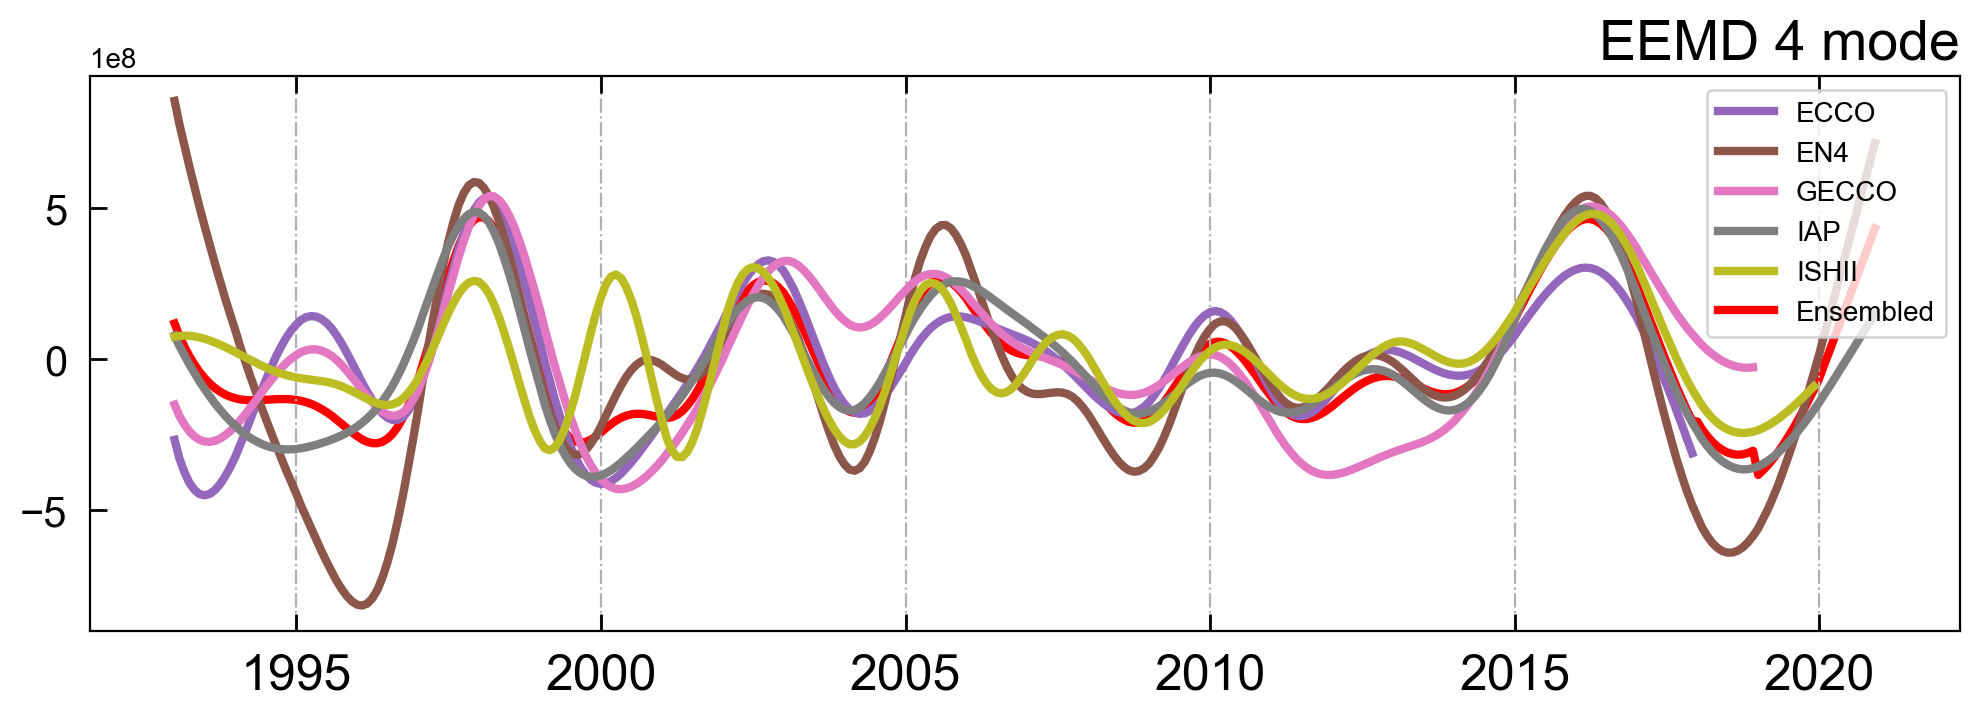

In [20]:
fig, axs = plt.subplots(1,1,figsize=(10,3.7),constrained_layout = True,dpi=200)
for i in myNm:
    f1 = axs.plot(TIME,myEEMDS[i], label=i,color=dta_colr(i),linewidth=3)
axs.plot(TIME,myEEMDS.mean(axis=1),label='Ensembled',linewidth=3,color='r',zorder=0)
axs.set_title('EEMD '+str(N)+' mode',loc='right',fontdict={'fontsize':20,'fontweight':'regular'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
xtick_location = TIME[24::12*5]
xtick_labels = TIME.strftime('%Y')[24::12*5]
axs.set_xticks(ticks=xtick_location)
plt.legend()
axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.tight_layout()
if 0:
    # plt.savefig(w_path+Dir_pth+'/ppt/'+save_name,
    #         facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(wpth+'EEMD_'+str(N)+'_mode',bbox_inches='tight')
plt.show()